First few rows of the dataset:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                  

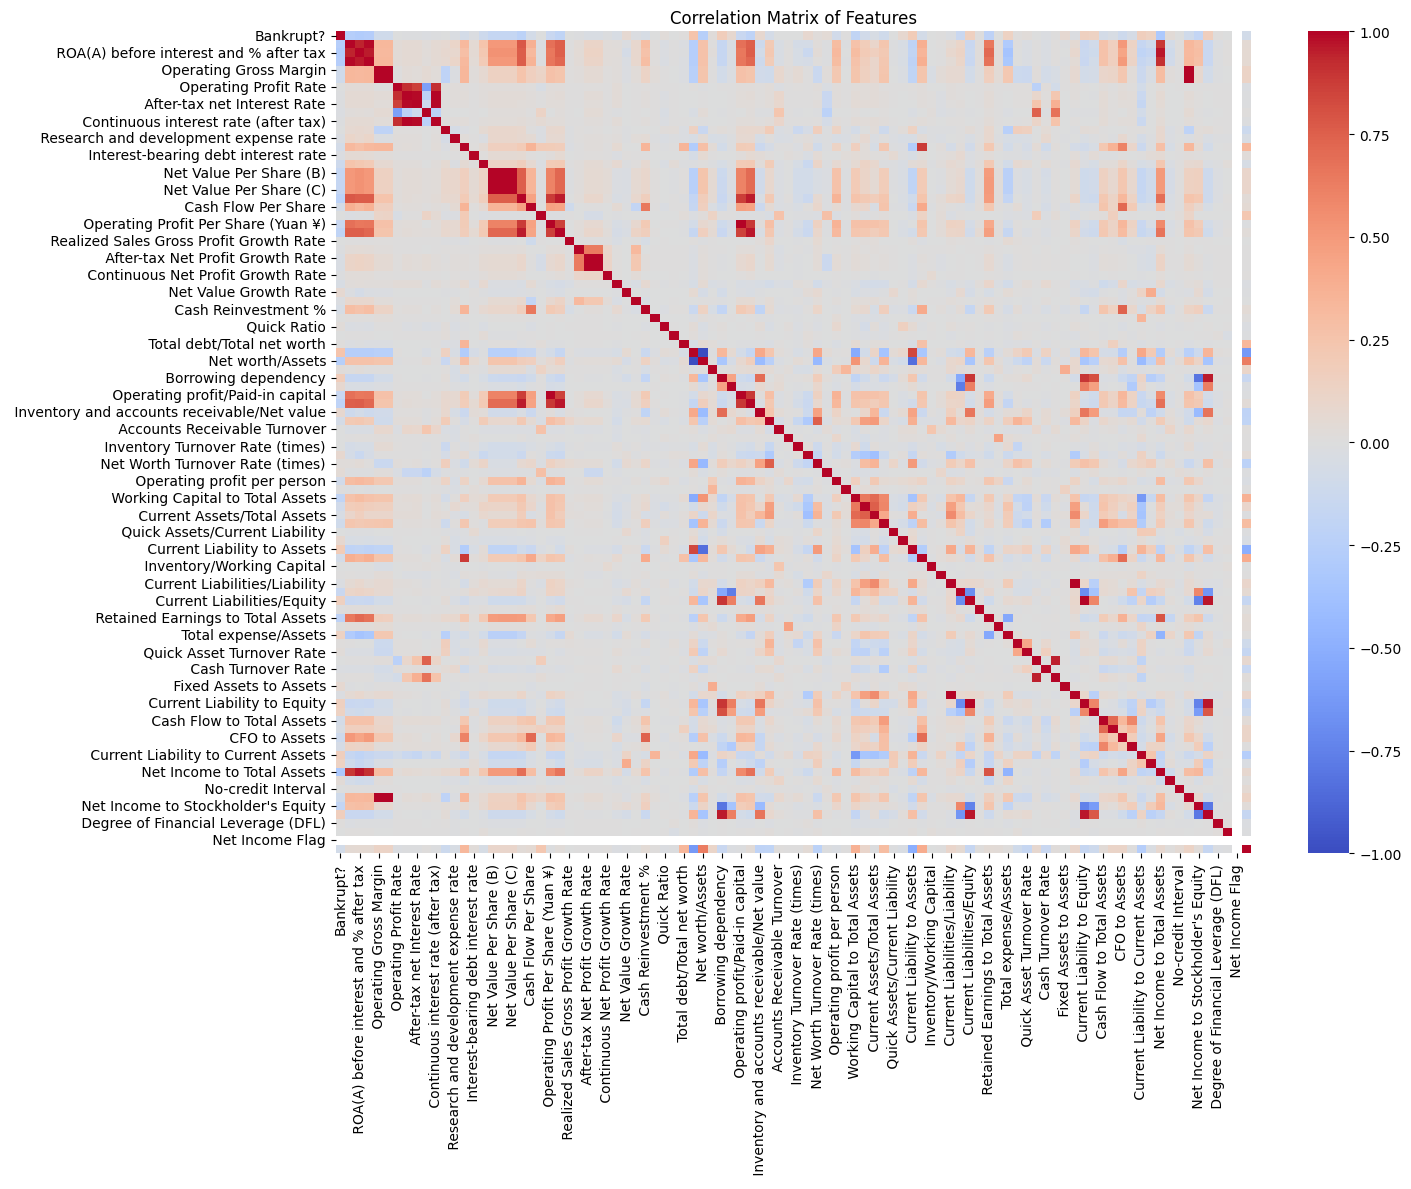

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


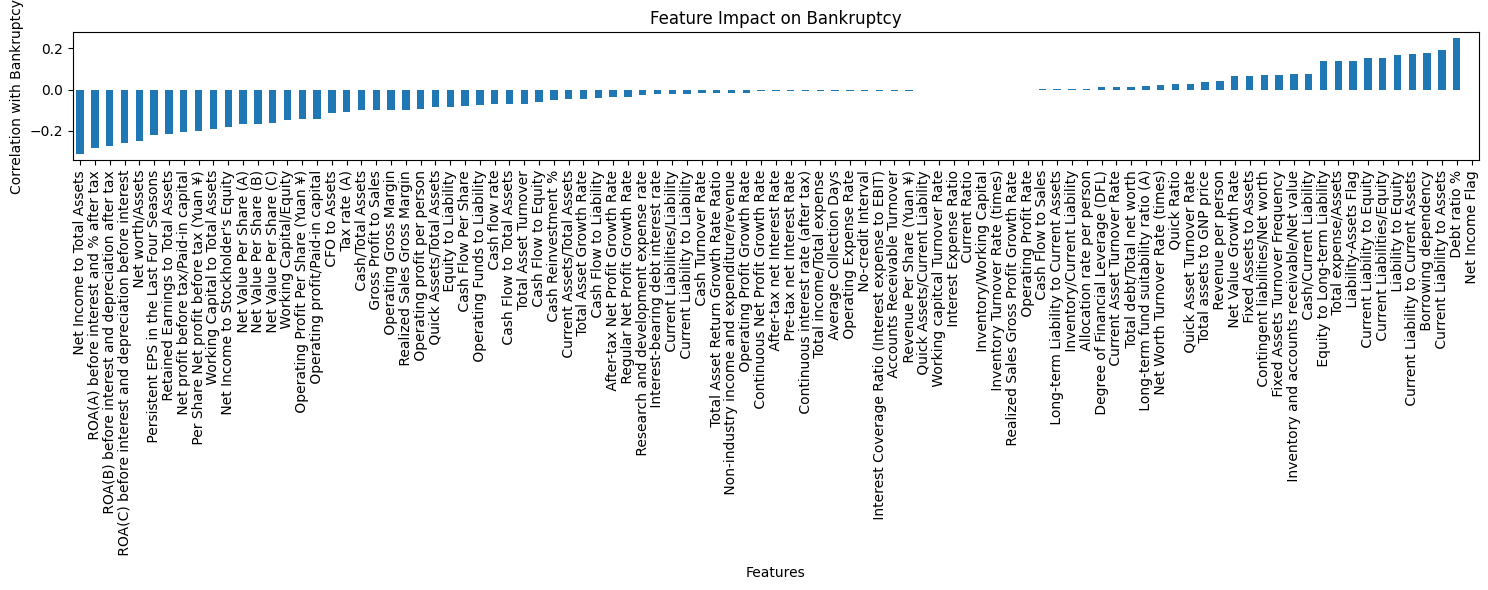

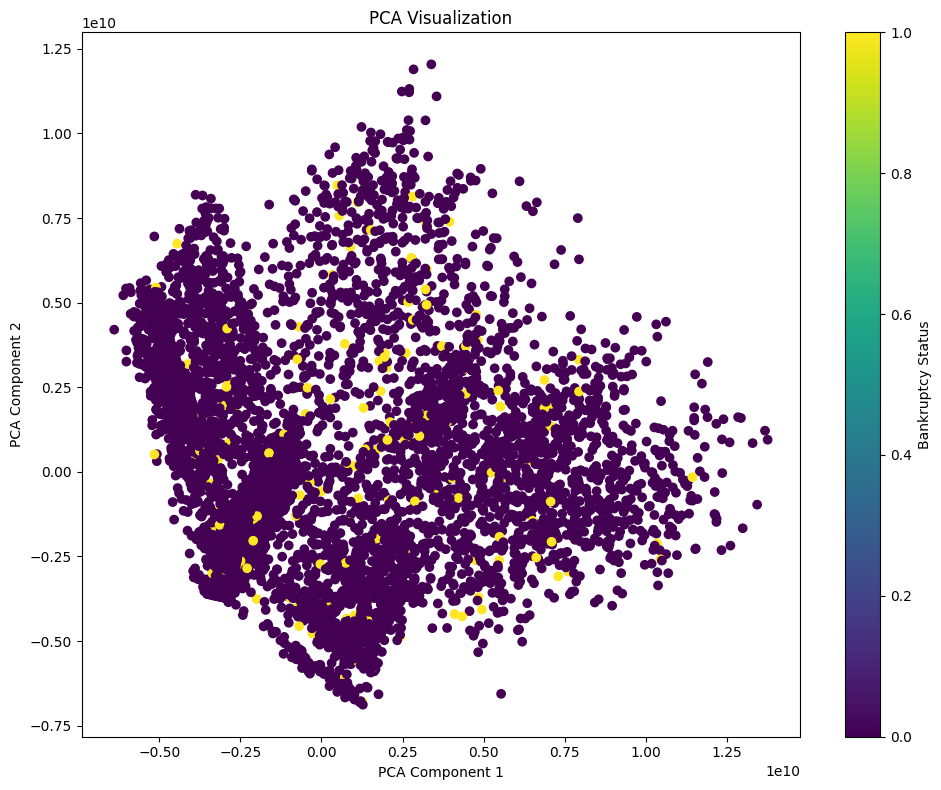

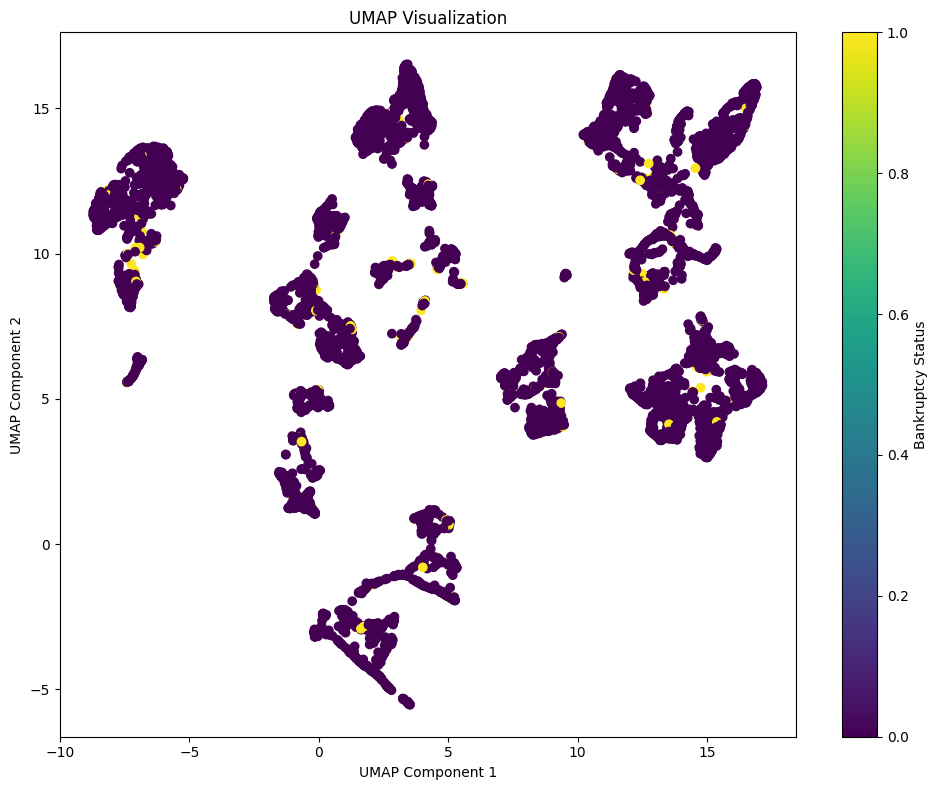

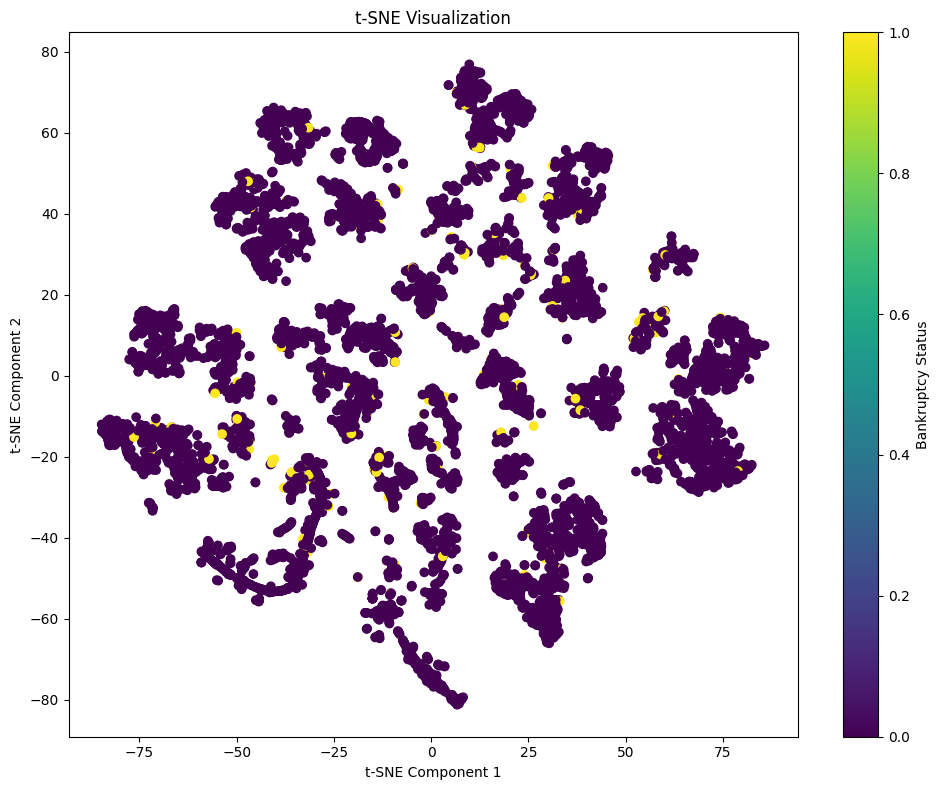

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from pathlib import Path
from typing import Tuple, Any
import numpy as np

class DataAnalyzer:
    def __init__(self, file_path: Path):
        """Initialize DataAnalyzer with the dataset file path."""
        self.file_path = file_path
        self.df = None
        self.target_column = 'Bankrupt?'
        
    def load_data(self) -> None:
        """Load the dataset from CSV file."""
        self.df = pd.read_csv(self.file_path)
        self.feature_columns = self.df.columns[self.df.columns != self.target_column]
        
    def display_basic_info(self) -> None:
        """Display basic information about the dataset."""
        print("First few rows of the dataset:")
        print(self.df.head())
        print("\nDimensions of the dataset:", self.df.shape)
        print("\nDescriptive statistics:\n", self.df.describe())
        
    def check_data_quality(self) -> None:
        """Check data quality including null values and duplicates."""
        print('\nNull values:', self.df.isnull().sum().sum())
        print("\nData types and missing values:\n")
        print(self.df.info())
        print('\nDuplicate values count:', self.df.duplicated().sum())
        
    def analyze_class_distribution(self) -> None:
        """Analyze and display class distribution of target variable."""
        total_samples = self.df.shape[0]
        class_counts = self.df[self.target_column].value_counts()
        
        print("\nClass distribution:")
        print(class_counts)
        
        stable_percent = 100 * class_counts[0] / total_samples
        bankrupt_percent = 100 * class_counts[1] / total_samples
        
        print(f'\nStable companies: {stable_percent:.2f}%')
        print(f'Bankrupt companies: {bankrupt_percent:.2f}%')
        
    def plot_correlation_matrix(self) -> None:
        """Plot correlation matrix heatmap."""
        plt.figure(figsize=(15, 12))
        correlation_matrix = self.df.corr()
        sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
        plt.title("Correlation Matrix of Features")
        plt.tight_layout()
        plt.show()
        
    def plot_feature_importance(self) -> None:
        """Plot feature importance based on correlation with target."""
        feature_target_correlation = self.df[self.feature_columns].corrwith(self.df[self.target_column])
        
        plt.figure(figsize=(15, 6))
        feature_target_correlation.sort_values().plot(kind='bar')
        plt.title("Feature Impact on Bankruptcy")
        plt.xlabel("Features")
        plt.ylabel("Correlation with Bankruptcy")
        plt.tight_layout()
        plt.show()
        
    def plot_dimensionality_reduction(self, method: str = 'all') -> None:
        """
        Plot dimensionality reduction visualizations.
        
        Args:
            method: One of 'pca', 'umap', 'tsne', or 'all'
        """
        X = self.df[self.feature_columns]
        y = self.df[self.target_column]
        
        methods = {
            'pca': (PCA(n_components=2), "PCA"),
            'umap': (UMAP(n_components=2), "UMAP"),
            'tsne': (TSNE(n_components=2), "t-SNE")
        }
        
        if method == 'all':
            selected_methods = methods
        elif method in methods:
            selected_methods = {method: methods[method]}
        else:
            raise ValueError(f"Unknown method: {method}")
            
        for method_name, (reducer, title) in selected_methods.items():
            reduced_data = reducer.fit_transform(X)
            
            plt.figure(figsize=(10, 8))
            plt.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                       c=y, cmap='viridis')
            plt.title(f"{title} Visualization")
            plt.xlabel(f"{title} Component 1")
            plt.ylabel(f"{title} Component 2")
            plt.colorbar(label='Bankruptcy Status')
            plt.tight_layout()
            plt.show()
            
    def run_analysis(self) -> None:
        """Run complete analysis pipeline."""
        self.load_data()
        self.display_basic_info()
        self.check_data_quality()
        self.analyze_class_distribution()
        self.plot_correlation_matrix()
        self.plot_feature_importance()
        self.plot_dimensionality_reduction()

def main():
    file_path = Path('dataset/data.csv')
    analyzer = DataAnalyzer(file_path)
    analyzer.run_analysis()

if __name__ == "__main__":
    main()